<a href="https://colab.research.google.com/github/OispovIA/masters_thesis/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start with a compelling introduction: Provide context for your data and analysis, including the source of the data, its relevance, and any overarching questions or hypotheses you wish to explore.

In [1]:
##### libraries

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import sys


In [ ]:
sys.path.append('../utils')  

from utils import find_constant_features

## Loading the data

In [3]:
# import
data = pd.read_csv('..\data\data.csv', sep=';',
                   index_col='Unnamed: 0', encoding='cp1251')

# rename some columns for readability
rename_dict = {
    '@NTG@': 'NTG',
    '@RVAR@': 'Lsand',
    '@PERMX@': 'perm',
    'КИН (100)': 'ORF100'
}
data.rename(columns=rename_dict, inplace=True)

print(data.shape)


(124416, 17)


In [4]:
data.head()

,PORO,SW,KRW,system_number,NTG,Lsand,perm,l_horiz,param_x,param_y,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,ORF100
1,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,45,1,0,0.0441
2,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,45,3,0,0.0514
3,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,45,6,0,0.0559
4,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,0,1,0,0.1548
5,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,0,3,0,0.1576


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124416 entries, 1 to 124416
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PORO            124416 non-null  float64
 1   SW              124416 non-null  float64
 2   KRW             124416 non-null  float64
 3   system_number   124416 non-null  int64  
 4   NTG             124416 non-null  float64
 5   Lsand           124416 non-null  int64  
 6   perm            124416 non-null  float64
 7   l_horiz         124416 non-null  int64  
 8   param_x         124416 non-null  int64  
 9   param_y         124416 non-null  int64  
 10  n_frac          124416 non-null  int64  
 11  xf_prod         124416 non-null  int64  
 12  xf_inj          124416 non-null  int64  
 13  rotation_angle  124416 non-null  int64  
 14  switch_period   124416 non-null  int64  
 15  dFrac           124416 non-null  int64  
 16  ORF100          124416 non-null  float64
dtypes: float64

There are no missing values, which is expected given the synthetic nature of the dataset. 

All columns in dataframe are numerical, but from the data description we know that `system_number` and `rotation_angle` are categorical:

In [6]:
data.system_number = data.system_number.astype('category')
data.rotation_angle = data.rotation_angle.astype('category')

drop parametres with no dispersion

In [41]:
find_constant_features(data)


Found 3 constant features.


['PORO', 'SW', 'KRW']

In [43]:
cols_to_drop = find_constant_features(data) + ['param_y']
data.drop(columns=cols_to_drop, inplace=True)


Found 3 constant features.


Let's check distribution of the target value

<Axes: xlabel='ORF100', ylabel='Count'>

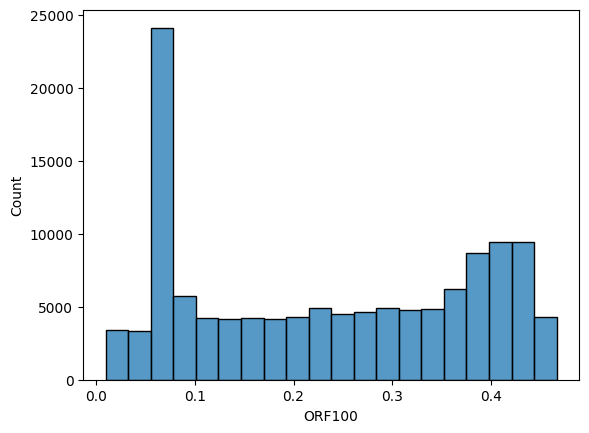

In [7]:
sns.histplot(data, x='ORF100', bins=20)

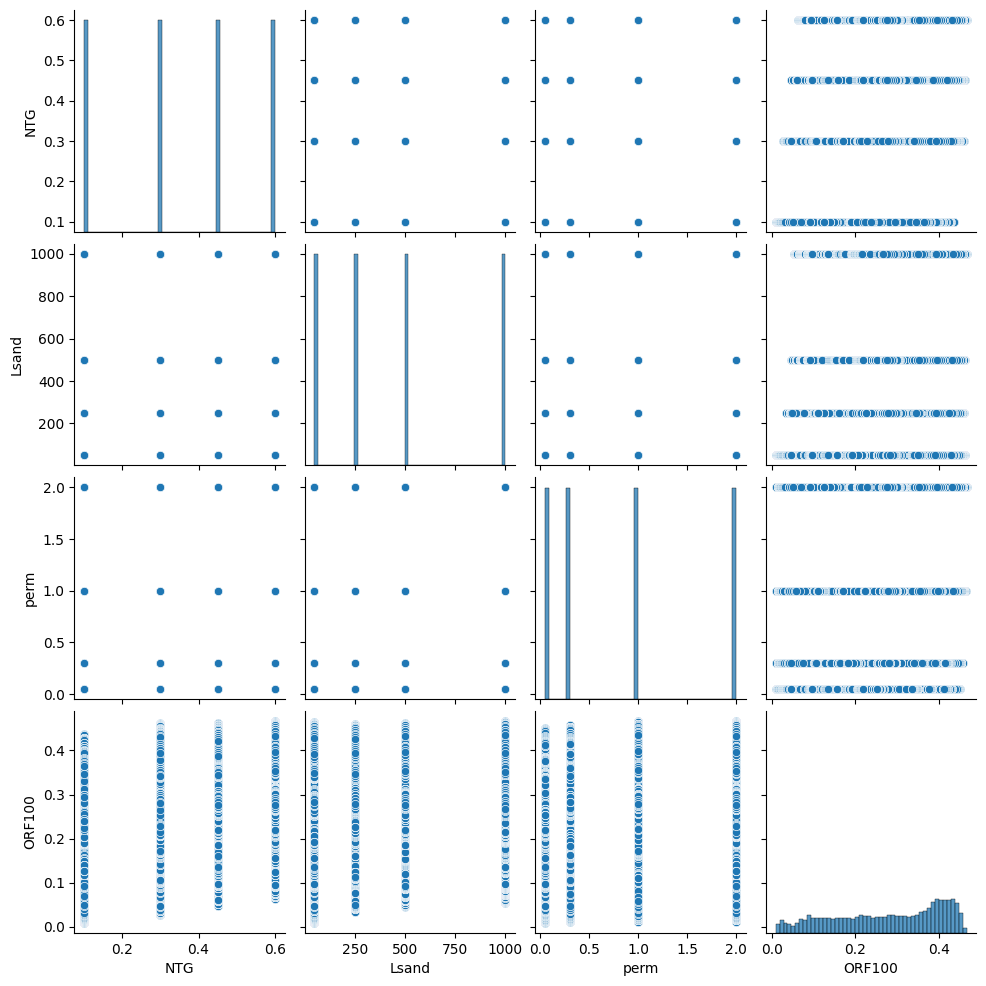

In [44]:
sns.pairplot(data[data.switch_period != 10000]
             [['NTG', 'Lsand', 'perm', 'system_number', 'ORF100']])


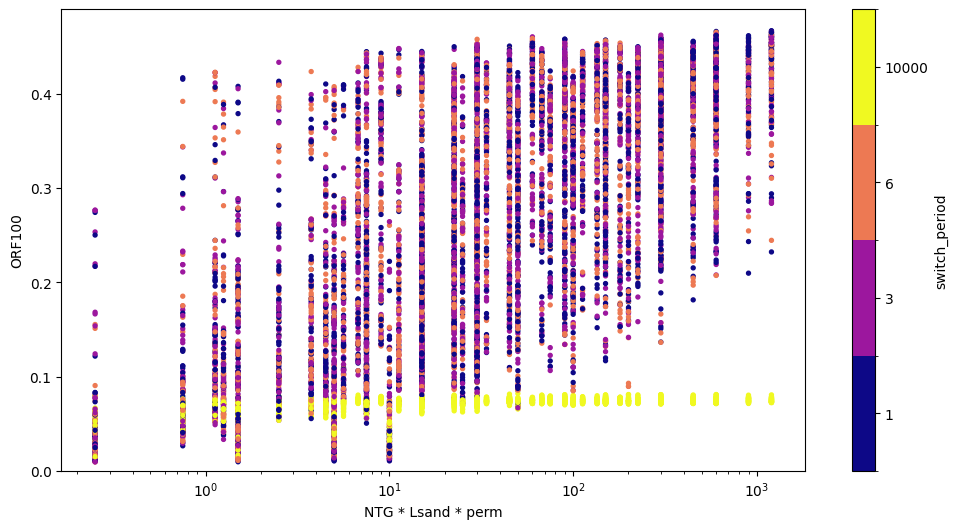

In [31]:
def plot_switch_period(data):

    df_plot = pd.DataFrame()
    df_plot['ORF100'] = data['ORF100']
    df_plot['geol'] = data['NTG'] * data['Lsand'] * data['perm']
    df_plot['switch_period'] = data['switch_period'].astype('category')
    ax = df_plot.sample(frac=0.1).plot.scatter(
        y='ORF100',
        x='geol',
        logx=True,
        c='switch_period',
        s=8,
        figsize=(12, 6),
        cmap="plasma", sharex=False,
        xlabel='NTG * Lsand * perm'
    )
    ax.set_ylim(bottom=0)
    plt.show()

plot_switch_period(data)


<Axes: xlabel='ORF100', ylabel='Density'>

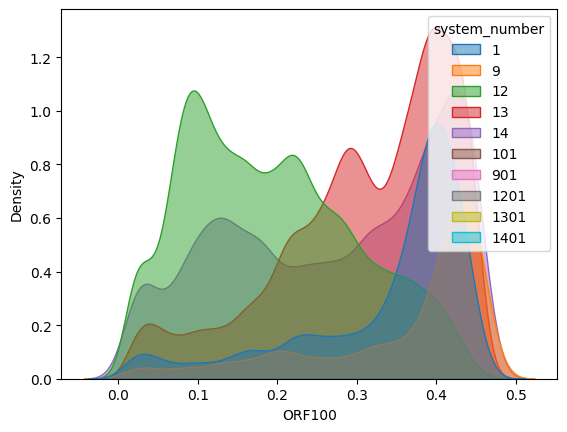

In [29]:
sns.kdeplot(
    data[data.switch_period != 10000],
    x='ORF100',
    hue="system_number",
    fill=True,
    alpha=.5
)

In [ ]:
data_inj = data[data.switch_period != 10000]
data_inj['switch_period'].unique()
data_inj['system_num_cat'] = pd.Categorical(data_inj.system_number)
data_inj['n_frac_cat'] = pd.Categorical(data_inj.n_frac)
data['switch_period_cat'] = pd.Categorical(data.switch_period)
data_inj['dFrac_cat'] = pd.Categorical(data_inj.dFrac)
data_inj['param_x_cat'] = pd.Categorical(data_inj.param_x)

C:\Users\User\AppData\Local\Temp\ipykernel_19996\3781794122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['system_num_cat'] = pd.Categorical(data_inj.system_number)
C:\Users\User\AppData\Local\Temp\ipykernel_19996\3781794122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['n_frac_cat'] = pd.Categorical(data_inj.n_frac)
C:\Users\User\AppData\Local\Temp\ipykernel_19996\3781794122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [15]:
corr = abs(data.drop(['param_y',
                      'PORO',
                      'SW',
                      'KRW',
                      'system_number',
                      'rotation_angle'
                      ], axis=1).corr(numeric_only=True))
corr.style.background_gradient(cmap='coolwarm').format(precision=3)


,NTG,Lsand,perm,l_horiz,param_x,n_frac,xf_prod,xf_inj,switch_period,dFrac,ORF100
NTG,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.311
Lsand,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.228
perm,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.294
l_horiz,0.000,0.000,0.000,1.000,0.213,0.801,0.230,0.198,0.067,0.698,0.255
param_x,0.000,0.000,0.000,0.213,1.000,0.247,0.147,0.072,0.081,0.127,0.128
n_frac,0.000,0.000,0.000,0.801,0.247,1.000,0.112,0.185,0.085,0.219,0.245
xf_prod,0.000,0.000,0.000,0.230,0.147,0.112,1.000,0.258,0.111,0.289,0.014
xf_inj,0.000,0.000,0.000,0.198,0.072,0.185,0.258,1.000,0.339,0.162,0.268
switch_period,0.000,0.000,0.000,0.067,0.081,0.085,0.111,0.339,1.000,0.032,0.569
dFrac,0.000,0.000,0.000,0.698,0.127,0.219,0.289,0.162,0.032,1.000,0.160


In [45]:
data.groupby(['system_number']).agg('mean')


C:\Users\User\AppData\Local\Temp\ipykernel_16004\3455549705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['system_number']).agg('mean')


,NTG,Lsand,perm,l_horiz,param_x,n_frac,xf_prod,xf_inj,switch_period,dFrac,ORF100,geol,geom
system_number,,,,,,,,,,,,,
1,0.3625,450.0,0.8375,0.0,200.000000,1.000000,92.857143,200.000000,3.333333,0.000000,0.335427,136.617188,136.617188
9,0.3625,450.0,0.8375,0.0,200.000000,1.000000,92.857143,200.000000,3.333333,0.000000,0.354925,136.617188,136.617188
12,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,3.333333,81.428571,0.192229,136.617188,136.617188
13,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,3.333333,81.428571,0.310726,136.617188,136.617188
14,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,3.333333,81.428571,0.273198,136.617188,136.617188
101,0.3625,450.0,0.8375,0.0,200.000000,1.000000,100.000000,100.000000,10000.000000,0.000000,0.074698,136.617188,136.617188
901,0.3625,450.0,0.8375,0.0,200.000000,1.000000,100.000000,100.000000,10000.000000,0.000000,0.074499,136.617188,136.617188
1201,0.3625,450.0,0.8375,1425.0,229.629630,20.583333,79.629630,79.629630,10000.000000,77.777778,0.069749,136.617188,136.617188
1301,0.3625,450.0,0.8375,1425.0,229.629630,20.583333,79.629630,79.629630,10000.000000,77.777778,0.072555,136.617188,136.617188


In [17]:
data.groupby(['system_number'])['ORF100'].agg(lambda x: x.value_counts().sum())


system_number
1       12096
9        8064
12      26880
13      26880
14      26880
101      1728
901      1152
1201     6912
1301     6912
1401     6912
Name: ORF100, dtype: int64

In [40]:
data.shape[0]

124416

In [42]:
(sum(data.switch_period == 10000) / data.shape[0]).__round__(2)

0.19

In [18]:
data['geom'] = data['NTG'] * data['Lsand']
data['geol'] = data['geom'] * data['perm']
data_inj['geom'] = data_inj['NTG'] * data_inj['Lsand']
data_inj['geol'] = data_inj['geom'] * data_inj['perm']

C:\Users\User\AppData\Local\Temp\ipykernel_19996\1318552690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['geom'] = data_inj['NTG'] * data_inj['Lsand']
C:\Users\User\AppData\Local\Temp\ipykernel_19996\1318552690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['geol'] = data_inj['geom'] * data_inj['perm']


In [21]:
data_inj['system_num_cat'].unique()

[1, 9, 12, 14, 13]
Categories (5, int64): [1, 9, 12, 13, 14]

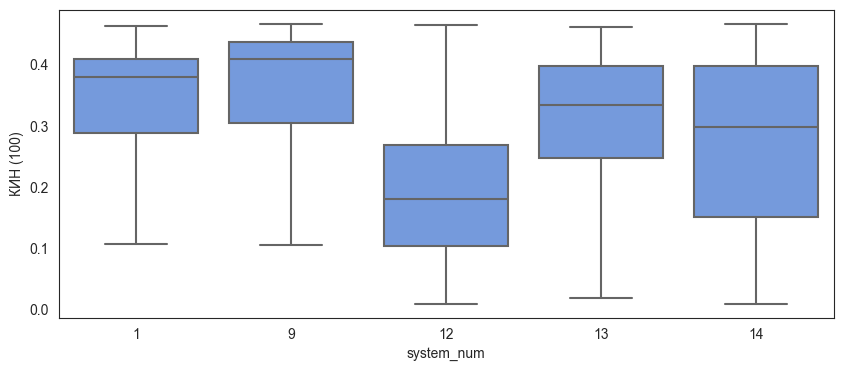

In [41]:
plt.rcParams['figure.figsize'] = 10, 4
ax = sns.boxplot(x='system_num', y='КИН (100)', data=data_inj,
                 color='cornflowerblue', showfliers=False)

plt.show()


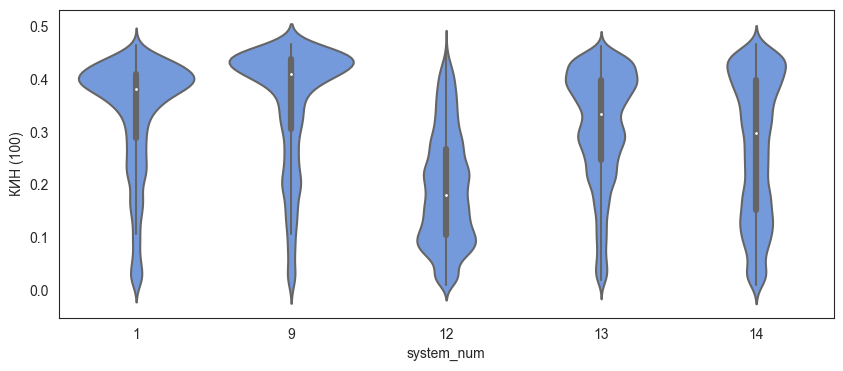

In [40]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 4
ax = sns.violinplot(x='system_num', y='КИН (100)', data=data_inj,
                 color='cornflowerblue', showfliers=False)

plt.show()

In [34]:
data_hor_syst = data_inj[data_inj.system_num >= 12]
data_hor_syst.shape

(80640, 24)

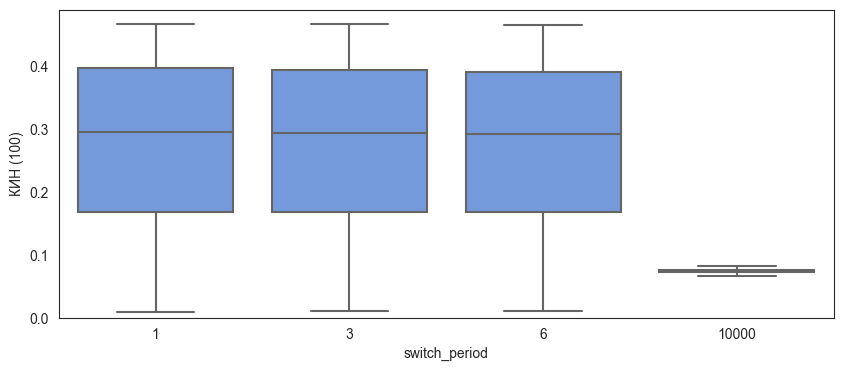

In [38]:
rcParams['figure.figsize'] = 10, 4
sns.set_style("white")
ax = sns.boxplot(x='switch_period', y='КИН (100)', data=data,
                 color='cornflowerblue', showfliers=False)
ax.set_ylim(bottom=0)
plt.show()


(0.0, 0.489665)

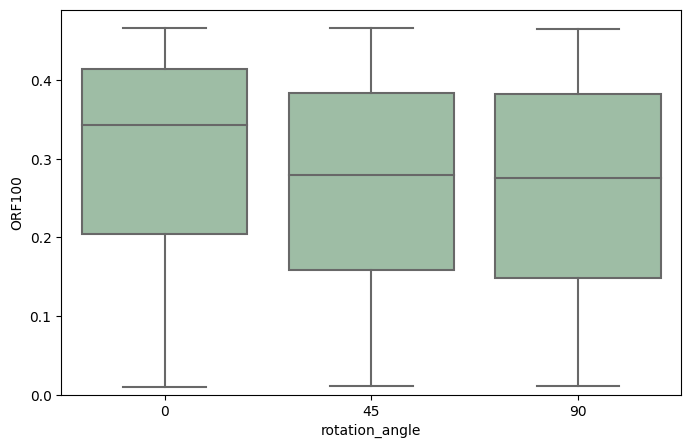

In [35]:
ax = sns.boxplot(x='rotation_angle',
                 y='ORF100',
                 data=data[data.switch_period != 10000],
                 color='#99c2a2',
                 showfliers=False
                 )
ax.set_ylim(bottom=0)


(0.0, 0.5259067009858295)

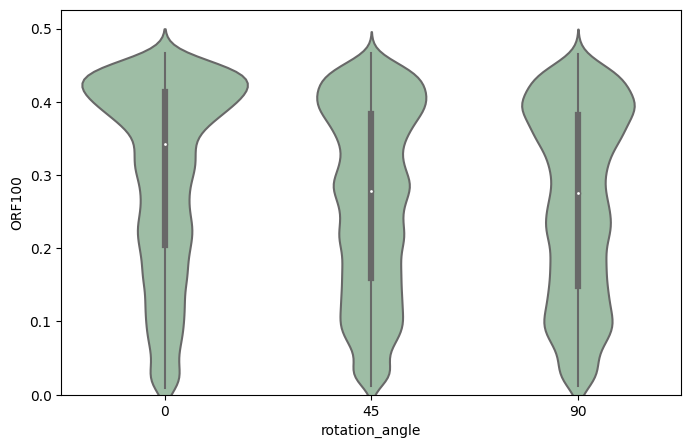

In [34]:
ax = sns.violinplot(x='rotation_angle',
                    y='ORF100',
                    data=data[data.switch_period != 10000],
                    color='#99c2a2',
                    showfliers=False
                    )
ax.set_ylim(bottom=0)


In [36]:
data[data.switch_period != 10000].drop(
    ['param_y', 'PORO', 'SW', 'KRW'], axis=1).groupby(
        ['rotation_angle']).agg('mean')

C:\Users\User\AppData\Local\Temp\ipykernel_25060\1561236480.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ['rotation_angle']).agg('mean')


,system_number,NTG,Lsand,perm,l_horiz,param_x,n_frac,xf_prod,xf_inj,switch_period,dFrac,ORF100
rotation_angle,,,,,,,,,,,,
0,10.760000,0.3625,450.0,0.8375,1026.000000,200.000000,10.540000,62.000000,176.000000,3.333333,72.000000,0.302728
45,11.697674,0.3625,450.0,0.8375,1193.023256,255.813953,18.058140,80.232558,167.441860,3.333333,62.790698,0.265866
90,10.846154,0.3625,450.0,0.8375,1169.230769,261.538462,17.717949,67.948718,117.948718,3.333333,61.538462,0.262371


In [52]:
data.drop(['param_y', 'PORO', 'SW', 'KRW'], axis=1).groupby(
    ['rotation_angle'])['КИН (100)'].agg(lambda x: x.value_counts().sum())

rotation_angle
0     32256
45    59904
90    32256
Name: КИН (100), dtype: int64